In [3]:
import os
from pathlib import Path
import sys
import tensorflow as tf
import imageio
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import PIL
from tensorflow.keras import layers
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython import display

In [4]:
dirname = os.path.dirname
ROOT_DIR = dirname(os.path.abspath(''))
sys.path.append(ROOT_DIR)

DATA_DIR = os.path.join(ROOT_DIR, 'data')
AUG_DIR = os.path.join(ROOT_DIR, 'augmented')
AUG_OUT_DIR = os.path.join(AUG_DIR, 'image')
CHECKPOINT_DIR = os.path.join(ROOT_DIR, 'checkpoints')
MODEL_DIR = os.path.join(ROOT_DIR, 'saved_models')

MODEL_LOC = os.path.join(MODEL_DIR, 'RecentModel', 'gen_model.h5')

In [5]:
generator = tf.keras.models.load_model(MODEL_LOC)

In [6]:
generator.summary()

Model: "GENERATOR"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 518400)            51840000  
_________________________________________________________________
batch_normalization (BatchNo (None, 518400)            2073600   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 518400)            0         
_________________________________________________________________
reshape (Reshape)            (None, 45, 45, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 45, 45, 128)       819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 45, 128)       512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 45, 45, 128)       0 

In [7]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

TypeError: unsupported operand type(s) for *: 'AxesImage' and 'float'

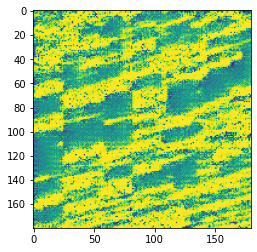

In [8]:
plt.imshow(generated_image[0, :, :, 0]) * 127.5 + 127.5